# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification 

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

In [1]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.shape

(303, 14)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


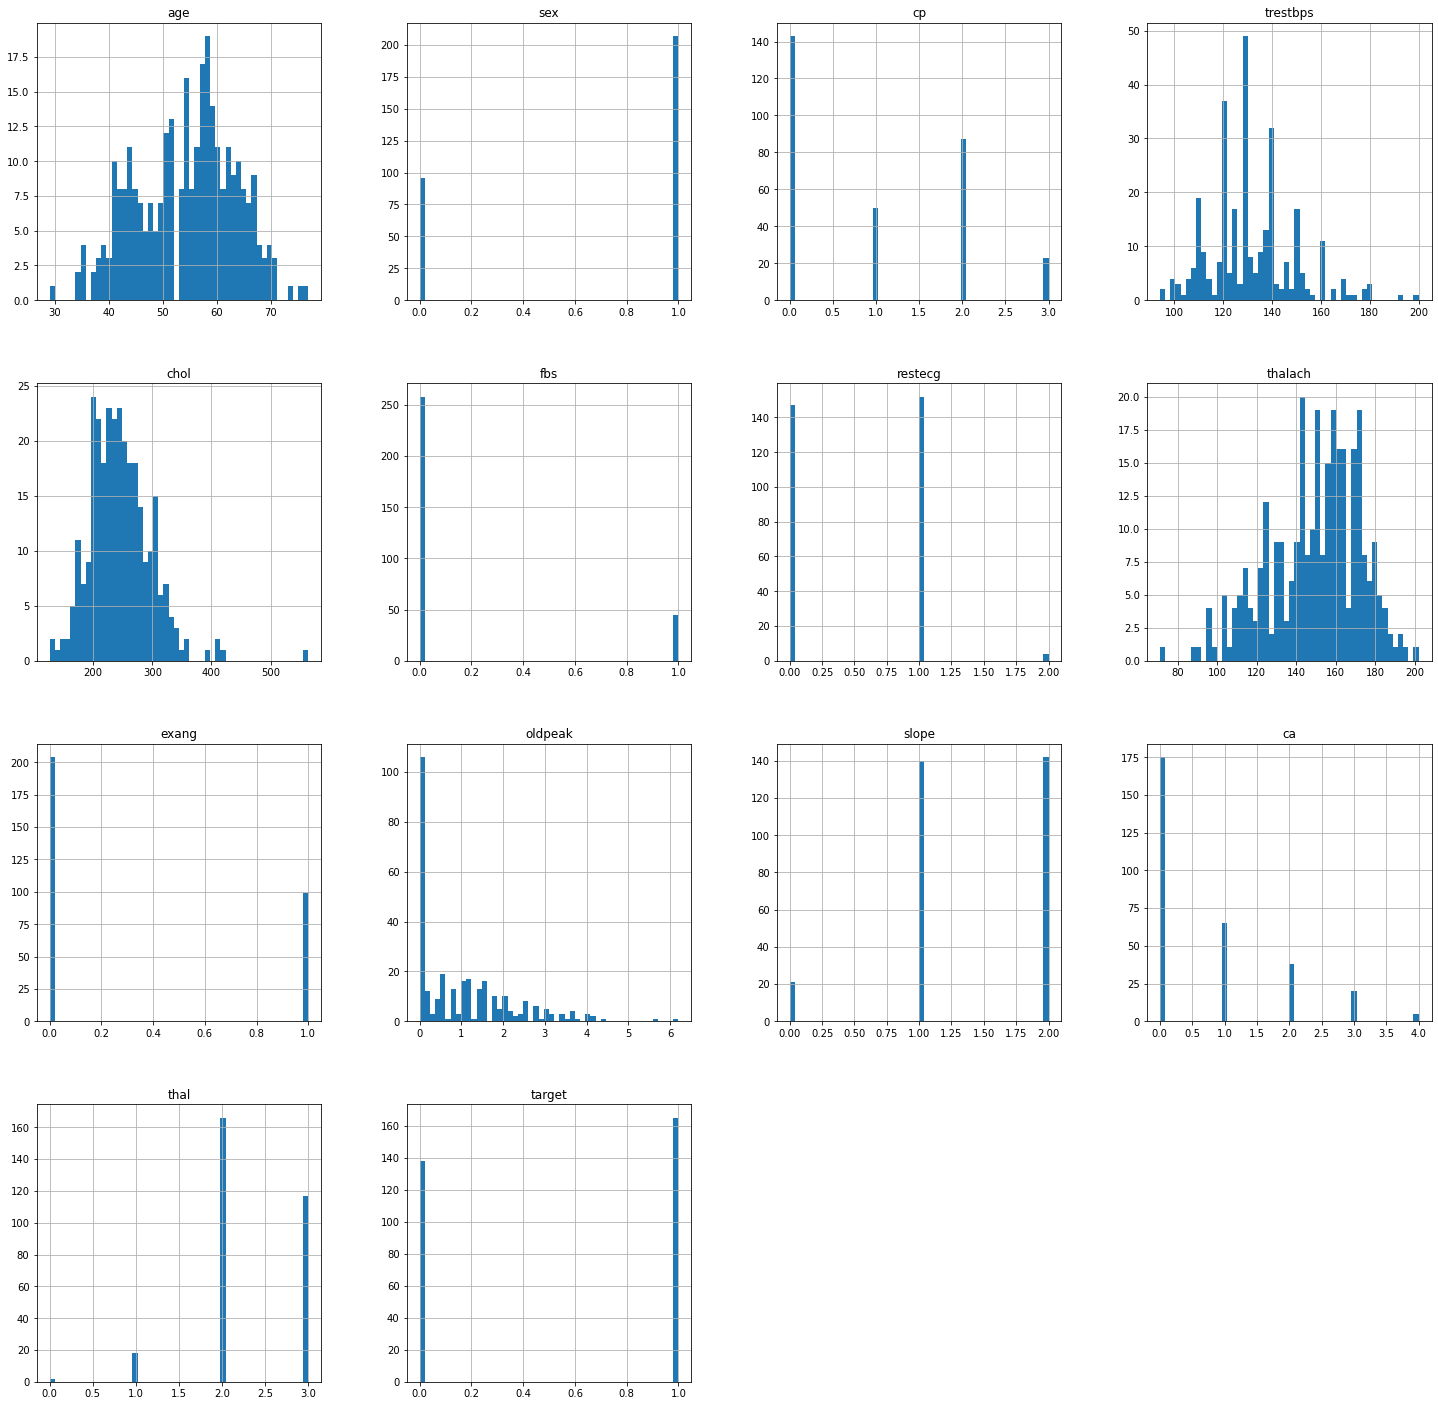

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,25))
plt.show()

In [4]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train_set, test_set = split_train_test(df, 0.2)
len(df)

303

In [6]:
len(train_set)

243

In [7]:
len(test_set)

60

In [8]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='slope', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='restecg', ylabel='cp'>,
        <AxesSubplot:xlabel='target', ylabel='cp'>],
       [<AxesSubplot:xlabel='cp', ylabel='slope'>,
        <AxesSubplot:xlabel='slope', ylabel='slope'>,
        <AxesSubplot:xlabel='thalach', ylabel='slope'>,
        <AxesSubplot:xlabel='restecg', ylabel='slope'>,
        <AxesSubplot:xlabel='target', ylabel='slope'>],
       [<AxesSubplot:xlabel='cp', ylabel='thalach'>,
        <AxesSubplot:xlabel='slope', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='restecg', ylabel='thalach'>,
        <AxesSubplot:xlabel='target', ylabel='thalach'>],
       [<AxesSubplot:xlabel='cp', ylabel='restecg'>,
        <AxesSubplot:xlabel='slope', ylabel='restecg'>,
        <AxesSubplot:xlabel='thalach', ylabel='restecg'>,
        <AxesSubplo

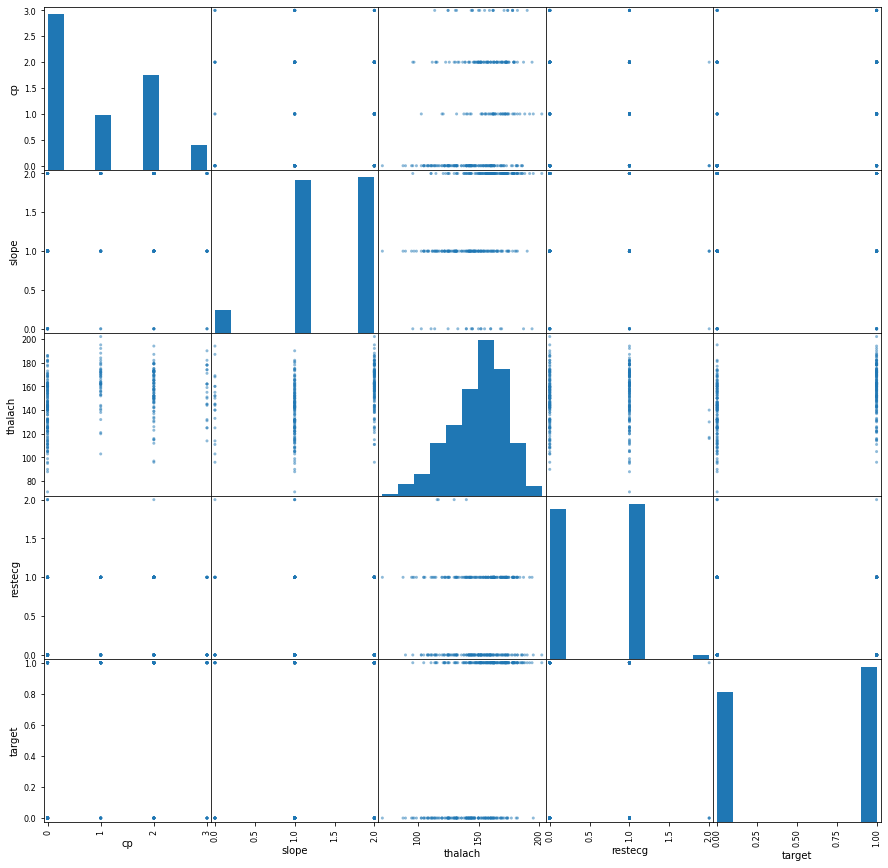

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["cp", "slope", "thalach", "restecg", "target"]
scatter_matrix(df[attributes], figsize = (15, 15))

In [10]:
from sklearn.preprocessing import OneHotEncoder
cp_cat = df[["cp"]]
cp_encoded = OneHotEncoder()
cp_cat_encoded = cp_encoded.fit_transform(cp_cat)
cp_types = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
df_cp=pd.DataFrame(cp_cat_encoded.toarray(),columns=cp_types)


In [11]:
df2 = pd.concat([df,df_cp], axis=1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain,asymptomatic
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import OneHotEncoder
sex_cat = df[["sex"]]
sex_encoded = OneHotEncoder()
sex_cat_encoded = sex_encoded.fit_transform(sex_cat)
sex_types = ["female", "male"]
df_sex=pd.DataFrame(sex_cat_encoded.toarray(), columns=sex_types)


In [13]:
df3 = pd.concat([df2,df_sex], axis=1)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain,asymptomatic,female,male
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0,0.0,1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import OneHotEncoder
restecg_cat = df[["restecg"]]
restecg_encoded = OneHotEncoder()
restecg_cat_encoded = restecg_encoded.fit_transform(restecg_cat)
restecg_types = ["normal", "ST-T wave abnormality", "showing probable or LVH"]
df_restecg=pd.DataFrame(restecg_cat_encoded.toarray(), columns=restecg_types)


In [15]:
df4 = pd.concat([df3,df_restecg], axis=1)
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,typical angina,atypical angina,non-anginal pain,asymptomatic,female,male,normal,ST-T wave abnormality,showing probable or LVH
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import OneHotEncoder
slope_cat = df[["slope"]]
slope_encoded = OneHotEncoder()
slope_cat_encoded = slope_encoded.fit_transform(slope_cat)
slope_types = ["upsloping", "flat", "downsloping"]
df_slope=pd.DataFrame(slope_cat_encoded.toarray(), columns=slope_types)


In [17]:
df5 = pd.concat([df4,df_slope], axis=1)
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,non-anginal pain,asymptomatic,female,male,normal,ST-T wave abnormality,showing probable or LVH,upsloping,flat,downsloping
0,63,1,3,145,233,1,0,150,0,2.3,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
thal_cat = df[["thal"]]
thal_cat
thal_encoded = OneHotEncoder()
thal_cat_encoded = thal_encoded.fit_transform(thal_cat)
thal_types = ["0", "thal_normal", "fixed defect", "reversable defect"]
df_thal=pd.DataFrame(thal_cat_encoded.toarray(), columns=thal_types)


In [19]:
df6 = pd.concat([df5,df_thal], axis=1)
df6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,normal,ST-T wave abnormality,showing probable or LVH,upsloping,flat,downsloping,0,thal_normal,fixed defect,reversable defect
0,63,1,3,145,233,1,0,150,0,2.3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
299,45,1,3,110,264,0,1,132,0,1.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,68,1,0,144,193,1,1,141,0,3.4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,57,1,0,130,131,0,1,115,1,1.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
clean_df = df6[["age", "female", "male", "typical angina", "atypical angina", "non-anginal pain", "asymptomatic", "trestbps", "chol", "fbs", "normal", "ST-T wave abnormality", "showing probable or LVH", "thalach", "exang", "oldpeak", "upsloping", "flat", "downsloping", "ca", "thal_normal", "fixed defect", "reversable defect", "target"]]
clean_df.head()
clean_df

,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,exang,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target
0,63,0.0,1.0,0.0,0.0,0.0,1.0,145,233,1,...,0,2.3,1.0,0.0,0.0,0,1.0,0.0,0.0,1
1,37,0.0,1.0,0.0,0.0,1.0,0.0,130,250,0,...,0,3.5,1.0,0.0,0.0,0,0.0,1.0,0.0,1
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,0,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1
3,56,0.0,1.0,0.0,1.0,0.0,0.0,120,236,0,...,0,0.8,0.0,0.0,1.0,0,0.0,1.0,0.0,1
4,57,1.0,0.0,1.0,0.0,0.0,0.0,120,354,0,...,1,0.6,0.0,0.0,1.0,0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1.0,0.0,1.0,0.0,0.0,0.0,140,241,0,...,1,0.2,0.0,1.0,0.0,0,0.0,0.0,1.0,0
299,45,0.0,1.0,0.0,0.0,0.0,1.0,110,264,0,...,0,1.2,0.0,1.0,0.0,0,0.0,0.0,1.0,0
300,68,0.0,1.0,1.0,0.0,0.0,0.0,144,193,1,...,0,3.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0
301,57,0.0,1.0,1.0,0.0,0.0,0.0,130,131,0,...,1,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0


In [21]:
train_set, test_set = split_train_test(clean_df, 0.2)
clean_df.shape

(303, 24)

In [22]:
train_set.shape

(243, 24)

In [23]:
test_set.shape

(60, 24)

In [24]:
x = train_set.iloc[:,:23]
y = train_set.iloc[:,23]
print(x)
print(y)

     age  female  male  typical angina  atypical angina  non-anginal pain  \
288   57     0.0   1.0             1.0              0.0               0.0   
259   38     0.0   1.0             0.0              0.0               0.0   
201   60     0.0   1.0             1.0              0.0               0.0   
153   66     1.0   0.0             0.0              0.0               1.0   
152   64     0.0   1.0             0.0              0.0               0.0   
..   ...     ...   ...             ...              ...               ...   
50    51     1.0   0.0             0.0              0.0               1.0   
174   60     0.0   1.0             1.0              0.0               0.0   
255   45     0.0   1.0             1.0              0.0               0.0   
31    65     0.0   1.0             1.0              0.0               0.0   
155   58     1.0   0.0             1.0              0.0               0.0   

     asymptomatic  trestbps  chol  fbs  ...  thalach  exang  oldpeak  \
288

In [25]:
X = test_set.iloc[:,:23]
Y = test_set.iloc[:,23]
X.head()

,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,thalach,exang,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,169,0,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,134,0,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,172,0,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,105,1,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,150,1,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0


In [26]:
Y.head()

128    1
282    0
2      1
139    1
219    0
Name: target, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_reg = model.fit(x,y)
lin_reg.predict(x.iloc[:,:])
train_set["predicted"] = lin_reg.predict(x.iloc[:,:])
train_set

<ipython-input-27-cbd2635a5f85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["predicted"] = lin_reg.predict(x.iloc[:,:])


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
288,57,0.0,1.0,1.0,0.0,0.0,0.0,110,335,0,...,3.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0,-0.046290
259,38,0.0,1.0,0.0,0.0,0.0,1.0,120,231,0,...,3.8,0.0,1.0,0.0,0,0.0,0.0,1.0,0,0.500746
201,60,0.0,1.0,1.0,0.0,0.0,0.0,125,258,0,...,2.8,0.0,1.0,0.0,1,0.0,0.0,1.0,0,-0.070013
153,66,1.0,0.0,0.0,0.0,1.0,0.0,146,278,0,...,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,1,0.767672
152,64,0.0,1.0,0.0,0.0,0.0,1.0,170,227,0,...,0.6,0.0,1.0,0.0,0,0.0,0.0,1.0,1,0.478334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,1.0,0.0,0.0,0.0,1.0,0.0,130,256,0,...,0.5,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1.027764
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,-0.122245
255,45,0.0,1.0,1.0,0.0,0.0,0.0,142,309,0,...,0.0,0.0,1.0,0.0,3,0.0,0.0,1.0,0,-0.129663
31,65,0.0,1.0,1.0,0.0,0.0,0.0,120,177,0,...,0.4,0.0,0.0,1.0,0,0.0,0.0,1.0,1,0.435469


In [28]:
df_train = pd.DataFrame(train_set)
df_train.sort_index(inplace=True)

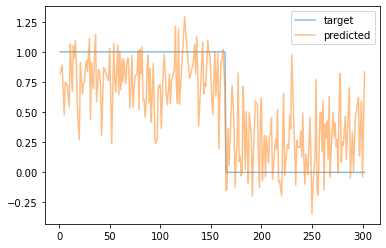

In [29]:
df_train[["target","predicted"]].plot(alpha=0.5);

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_reg = model.fit(x,y)
lin_reg.predict(x.iloc[:,:])
train_set["predicted"] = lin_reg.predict(x.iloc[:,:]).round()
train_set

<ipython-input-74-863ea3a128c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["predicted"] = lin_reg.predict(x.iloc[:,:]).round()


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
288,57,0.0,1.0,1.0,0.0,0.0,0.0,110,335,0,...,3.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0,-0.0
259,38,0.0,1.0,0.0,0.0,0.0,1.0,120,231,0,...,3.8,0.0,1.0,0.0,0,0.0,0.0,1.0,0,1.0
201,60,0.0,1.0,1.0,0.0,0.0,0.0,125,258,0,...,2.8,0.0,1.0,0.0,1,0.0,0.0,1.0,0,-0.0
153,66,1.0,0.0,0.0,0.0,1.0,0.0,146,278,0,...,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,1,1.0
152,64,0.0,1.0,0.0,0.0,0.0,1.0,170,227,0,...,0.6,0.0,1.0,0.0,0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,1.0,0.0,0.0,0.0,1.0,0.0,130,256,0,...,0.5,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1.0
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,-0.0
255,45,0.0,1.0,1.0,0.0,0.0,0.0,142,309,0,...,0.0,0.0,1.0,0.0,3,0.0,0.0,1.0,0,-0.0
31,65,0.0,1.0,1.0,0.0,0.0,0.0,120,177,0,...,0.4,0.0,0.0,1.0,0,0.0,0.0,1.0,1,0.0


In [28]:
df_train = pd.DataFrame(train_set)
df_train.sort_index(inplace=True)

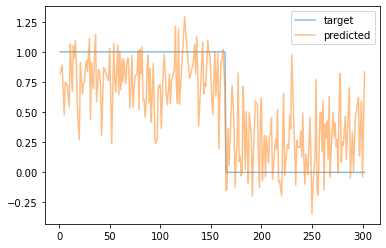

In [75]:
df_train[["target","predicted"]].plot(alpha=0.5);

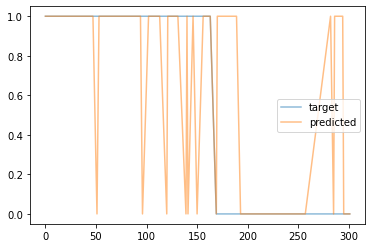

In [67]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_reg = model.fit(x,y)
lin_reg.predict(X.iloc[:,:])
test_set["predicted"] = lin_reg.predict(X.iloc[:,:]).round()
test_set.head()

<ipython-input-65-4d2ba885c556>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = lin_reg.predict(X.iloc[:,:]).round()


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1.0
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0,0,1.0
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1.0
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0,1,0.0
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0,0.0


In [66]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

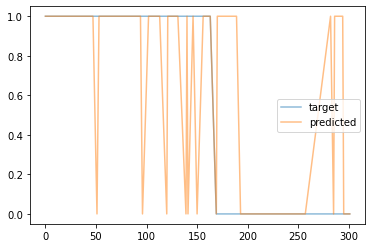

In [67]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[20,  5],
       [ 6, 29]], dtype=int64)

In [33]:
params = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
params

thal_normal                0.264196
fixed defect               0.246089
asymptomatic               0.125243
female                     0.097317
non-anginal pain           0.078724
reversable defect          0.060831
fbs                        0.054214
ST-T wave abnormality      0.047250
upsloping                  0.046560
downsloping                0.043150
atypical angina            0.024195
thalach                    0.001775
chol                      -0.000721
normal                    -0.000943
age                       -0.001586
trestbps                  -0.002221
showing probable or LVH   -0.046307
oldpeak                   -0.052873
exang                     -0.053925
ca                        -0.083798
flat                      -0.089710
male                      -0.097317
typical angina            -0.228162
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
lin_pred = lin_reg.predict(X.iloc[:,:])
lin_mse = mean_squared_error(Y, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.32927707473443085

In [35]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, x, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [0.33277342 0.33794807 0.39658055 0.36625896 0.35121607 0.35423327
 0.38076262 0.44017572 0.36939689 0.37061944]
Mean: 0.36999650217114183
Standard deviation: 0.029624829216555626


In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor().fit(x,y)
tree_reg.predict(X.iloc[:,:])
test_set["predicted"] = tree_reg.predict(X.iloc[:,:])
test_set.head()

<ipython-input-37-0e98ee1d630a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = tree_reg.predict(X.iloc[:,:])


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1.0
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0,0,1.0
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1.0
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0,1,0.0
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0,0.0


In [38]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

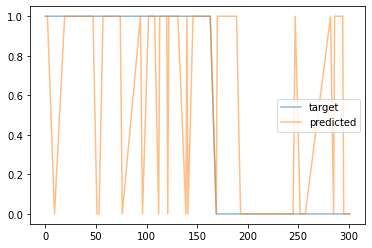

In [39]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[19,  6],
       [ 9, 26]], dtype=int64)

In [41]:
from sklearn.metrics import mean_squared_error
tree_pred = tree_reg.predict(X.iloc[:,:])
tree_mse = mean_squared_error(Y, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.6        0.52915026 0.56568542 0.6770032  0.64549722 0.57735027
 0.57735027 0.61237244 0.35355339 0.54006172]
Mean: 0.567802420145203
Standard deviation: 0.08326911198387818


In [69]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)
forest_reg.predict(X.iloc[:,:])
test_set["predicted"] = forest_reg.predict(X.iloc[:,:]).round()
test_set.head()

<ipython-input-69-713cd35e840a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = forest_reg.predict(X.iloc[:,:]).round()


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1.0
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0,0,0.0
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1.0
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0,1,0.0
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0,0.0


In [70]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

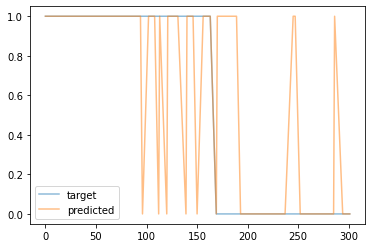

In [71]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[20,  5],
       [ 5, 30]], dtype=int64)

In [46]:
forest_pred = forest_reg.predict(X.iloc[:,:])
forest_mse = mean_squared_error(Y, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3281158332052874

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, x, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.3522783  0.35662866 0.40288956 0.38215943 0.40797263 0.42673665
 0.37504444 0.47181829 0.31463603 0.36945906]
Mean: 0.3859623062926076
Standard deviation: 0.041585231208022246


In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x,y)
log_reg.predict(X.iloc[:,:])
test_set["predicted"] = log_reg.predict(X.iloc[:,:])
test_set.head()


C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-48-46ebce9b838d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = log_reg.predict(X.iloc[:,:])


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0,0,1
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0,1,0
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0,0


In [49]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

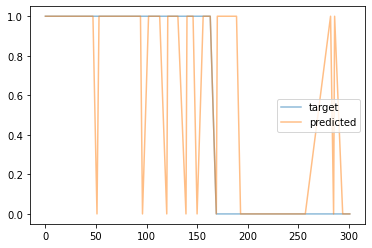

In [50]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[21,  4],
       [ 5, 30]], dtype=int64)

In [52]:
log_pred = log_reg.predict(X.iloc[:,:])
log_mse = mean_squared_error(Y, log_pred)
log_rmse = np.sqrt(log_mse)
log_rmse

0.3872983346207417

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x, y, scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-scores)
display_scores(log_rmse_scores)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores: [0.4        0.4472136  0.4        0.40824829 0.45643546 0.28867513
 0.40824829 0.45643546 0.40824829 0.35355339]
Mean: 0.40270579212549107
Standard deviation: 0.04824981853417473


In [1]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x, y)
Y_model = model.predict(X)
test_set["predicted"] = model.predict(X)
test_set.head()

NameError: name 'x' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_model)

In [56]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

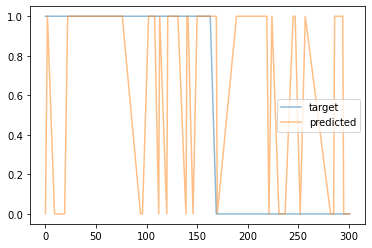

In [57]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[11, 14],
       [ 9, 26]], dtype=int64)

In [59]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x,y)
SVM.predict(X.iloc[:,:])
test_set["predicted"] = SVM.predict(X.iloc[:,:])
test_set.head()

C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-59-0f1dd19e8d72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = SVM.predict(X.iloc[:,:])


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
128,52,1.0,0.0,0.0,0.0,1.0,0.0,136,196,0,...,0.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
282,59,0.0,1.0,0.0,0.0,1.0,0.0,126,218,1,...,2.2,0.0,1.0,0.0,1,1.0,0.0,0.0,0,1
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
139,64,0.0,1.0,1.0,0.0,0.0,0.0,128,263,0,...,0.2,0.0,1.0,0.0,1,0.0,0.0,1.0,1,1
219,48,0.0,1.0,1.0,0.0,0.0,0.0,130,256,1,...,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0,1


In [60]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

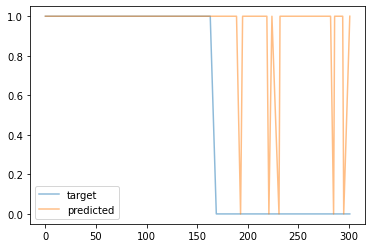

In [61]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[ 5, 20],
       [ 0, 35]], dtype=int64)

In [63]:
SVM_pred = SVM.predict(X.iloc[:,:])
SVM_mse = mean_squared_error(Y, SVM_pred)
SVM_rmse = np.sqrt(SVM_mse)
SVM_rmse

0.5773502691896257

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM, x, y, scoring="neg_mean_squared_error", cv=10)
SVM_rmse_scores = np.sqrt(-scores)
display_scores(SVM_rmse_scores)

Scores: [0.52915026 0.6        0.56568542 0.5        0.5        0.73598007
 0.35355339 0.57735027 0.57735027 0.45643546]
Mean: 0.5395505152916307
Standard deviation: 0.09514151625448503


C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations